In [2]:
from matplotlib import pyplot as plt
import cartopy.crs as ccrs # A toolkit for map projections
import pyart


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/g/data/en0/jss548/miniconda3/envs/openradar/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
#this is accessible to anyone on kl02
vol_ffn = '/g/data/kl02/jss548/aura/testing_files/dp/02_20200119_050031.pvol.h5'
#set plotting limits
min_lon = 144.7
max_lon = 145.6
min_lat = -38.0
max_lat = -37.5

/g/data/en0/jss548/miniconda3/envs/openradar/lib/python3.8/site-packages/cartopy/crs.py:814: DeprecationWarning: The 'geom_factory' function is deprecated in Shapely 2.0, and will be removed in a future version
  return cartopy.trace.project_linear(geometry, src_crs, self)
/g/data/en0/jss548/miniconda3/envs/openradar/lib/python3.8/site-packages/cartopy/crs.py:827: DeprecationWarning: The 'geom_factory' function is deprecated in Shapely 2.0, and will be removed in a future version
  multi_line_string = cartopy.trace.project_linear(linear_ring,
/g/data/en0/jss548/miniconda3/envs/openradar/lib/python3.8/site-packages/cartopy/crs.py:827: DeprecationWarning: The 'geom_factory' function is deprecated in Shapely 2.0, and will be removed in a future version
  multi_line_string = cartopy.trace.project_linear(linear_ring,
/g/data/en0/jss548/miniconda3/envs/openradar/lib/python3.8/site-packages/cartopy/crs.py:827: DeprecationWarning: The 'geom_factory' function is deprecated in Shapely 2.0, and w

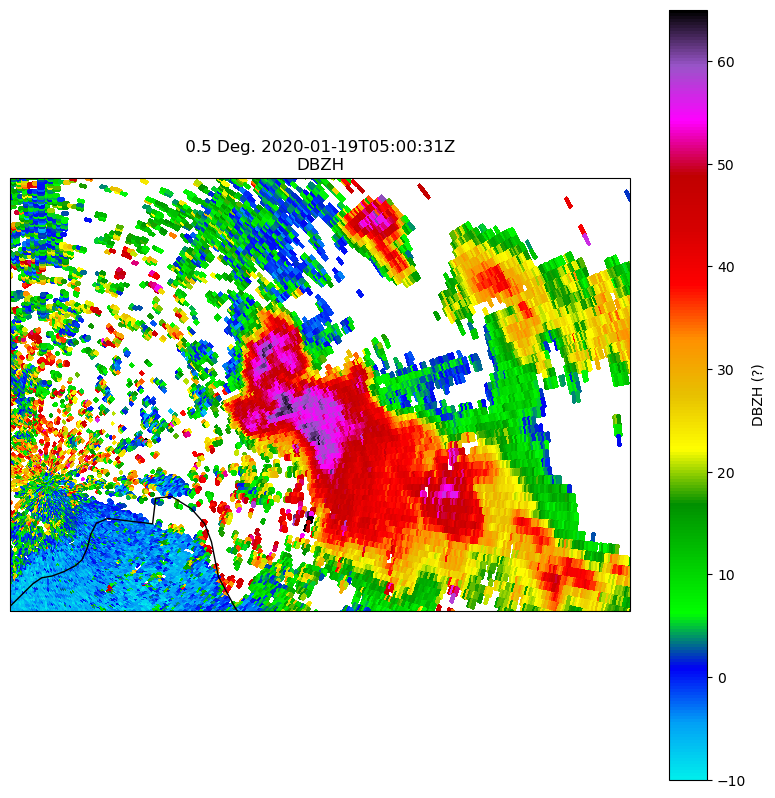

In [9]:
#investigate case using ppi data

#load data
radar = pyart.aux_io.read_odim_h5(vol_ffn, file_field_names=True)
# Set up the GIS projection 
projection = ccrs.Mercator( 
                central_longitude=radar.longitude['data'][0], 
                min_latitude=min_lat, max_latitude=max_lat) 
#plot
fig = plt.figure(figsize=(10,10))
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('DBZH', 0,
                    projection=projection, resolution='10m',
                    min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat,
                    cmap='pyart_NWSRef')

In [10]:
#create grid object
grid = pyart.map.grid_from_radars(
                    radar,
                    grid_shape = (1, 601, 601),
                    grid_limits = ((500, 500), (-150000.0, 150000.0), (-150000.0, 150000.0)),
                    roi_func = 'constant',
                    constant_roi = 1500,
                    weighting_function = 'Nearest',
                    gridding_algo = 'map_to_grid',
                    fields = ['DBZH'])
#this grid shape determines the number of elements in the grid (so it's a 2D array, with 601x601 elements),
#the grid limits determine the physical bounds of this array, and thereby the bin size (300x300km over 601x601 elemenets gives a 500m bin size)
#Nearest neighbour interpolation is most suitable for boundary detection

/g/data/en0/jss548/miniconda3/envs/openradar/lib/python3.8/site-packages/cartopy/crs.py:814: DeprecationWarning: The 'geom_factory' function is deprecated in Shapely 2.0, and will be removed in a future version
  return cartopy.trace.project_linear(geometry, src_crs, self)
/g/data/en0/jss548/miniconda3/envs/openradar/lib/python3.8/site-packages/cartopy/crs.py:814: DeprecationWarning: The 'geom_factory' function is deprecated in Shapely 2.0, and will be removed in a future version
  return cartopy.trace.project_linear(geometry, src_crs, self)


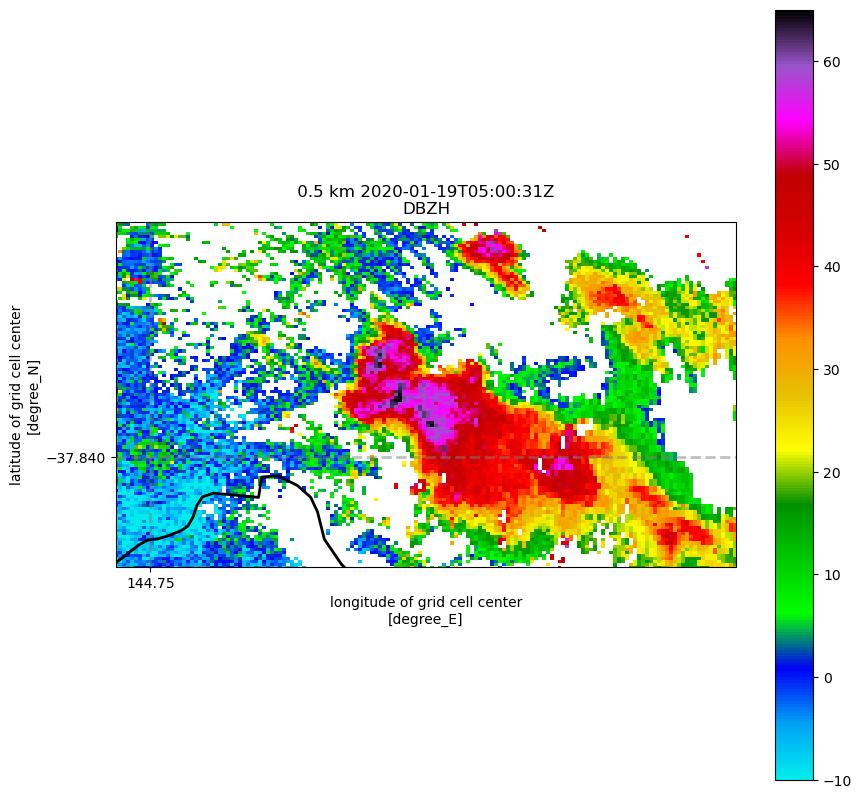

In [11]:
#investigate case using grid data

#plot
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
display_grid = pyart.graph.GridMapDisplay(grid)
display_grid.plot_grid('DBZH', level=0, ax=ax, projection=ccrs.PlateCarree(), cmap='pyart_NWSRef')
ax.set_extent([min_lon, max_lon, min_lat, max_lat])


In [12]:
#save to geotif
geotiff_fn = 'test.tif'
pyart.io.write_grid_geotiff(grid, geotiff_fn, 'DBZH', rgb=True, level=0, cmap='pyart_NWSRef')
#the black background is a bit annoying. If you need to remove this using python I can look into my other code.